In [1]:
using QuadraticTeamDecisionSolver, Statistics, LinearAlgebra, Plots

In [82]:
m = 100000;
μ = 0.0;
σ = 1.0;
H₁ = sampleComplexNormal(μ, σ, m);
H₂ = sampleComplexNormal(μ, σ, m);

In [83]:
H(N) = [[sampleComplexNormal(μ, σ, N) for _ in 1:m] for i in 1:2] #only need 2

H (generic function with 1 method)

In [84]:
σᵣ = 10 .^ range(-10, stop=10, length=101);

In [85]:
function bound(N, σ)
    C = H(N)
    return sqrt(N*(N-1)*Statistics.mean([abs( dot(h1, h2) / (dot(h1, h1) + σ))^2 for (h1, h2) in zip(C[1], C[2])]))
end

bound (generic function with 1 method)

In [86]:
bounds = [bound.(N, σᵣ) for N in 2:15];

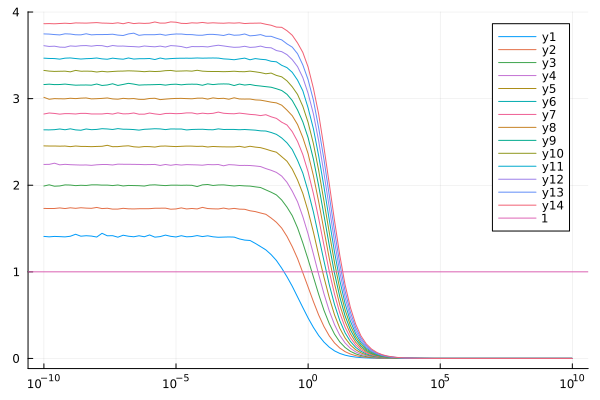

In [87]:
p1 = plot(σᵣ, bounds,xscale=:log10)
hline!(p1, [1], label="1")

In [96]:
indeces = [findfirst(x -> x < 1, b) for b in bounds];

In [99]:
min_sigmas = [σᵣ[i] for (b,i) in zip(bounds, indeces)]

14-element Vector{Float64}:
  0.15848931924611134
  0.6309573444801932
  1.5848931924611136
  2.51188643150958
  3.9810717055349722
  6.309573444801933
 10.0
 10.0
 10.0
 15.848931924611133
 15.848931924611133
 15.848931924611133
 25.118864315095795
 25.118864315095795

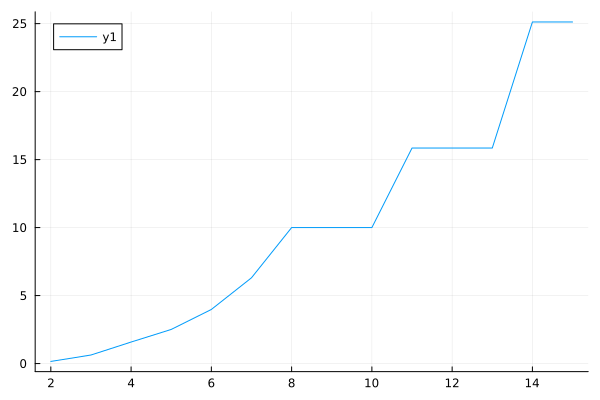

In [101]:
plot(2:15, min_sigmas)